In [1]:
import sys
import os

# Append the directory of the module to the Python path
sys.path.append("/Users/sherryyang/Projects/super-segger-toolkit/superseggertoolkit")

In [2]:
from cell import Cell
from link_composer import LinkComposer
import cells_extractor 
import visualizer
import link_algorithm
from cell_event import CellEvent, CellDefine, Cell


In [3]:
cells_extractor.read_tiff_frame_like_cv2("/Users/sherryyang/Downloads/Reference-mask-EcoliLargerDataSet/EcoliK12.T000.tif", 1)

In [5]:
from PIL import Image
import numpy as np

# File path
file_path = "/Users/sherryyang/Documents/wiggins-lab/kevins-data/3d/dnaA_xy1_masks.tif"

# Open the image file
with Image.open(file_path) as img:
    img.seek(100)
    # Ensure you're working with the first frame
    img_gray = img.convert('L')

    # Convert the image to a 2D numpy array
    img_array = np.array(img_gray)

# Print the shape of the array to confirm it's 2D
print("Array shape:", img_array.shape)

# Optional: print the array
print(img_array)

Array shape: (302, 302)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [51]:
np.unique(img_array)

array([0, 1, 2, 3, 4, 5, 6, 7, 9], dtype=uint8)

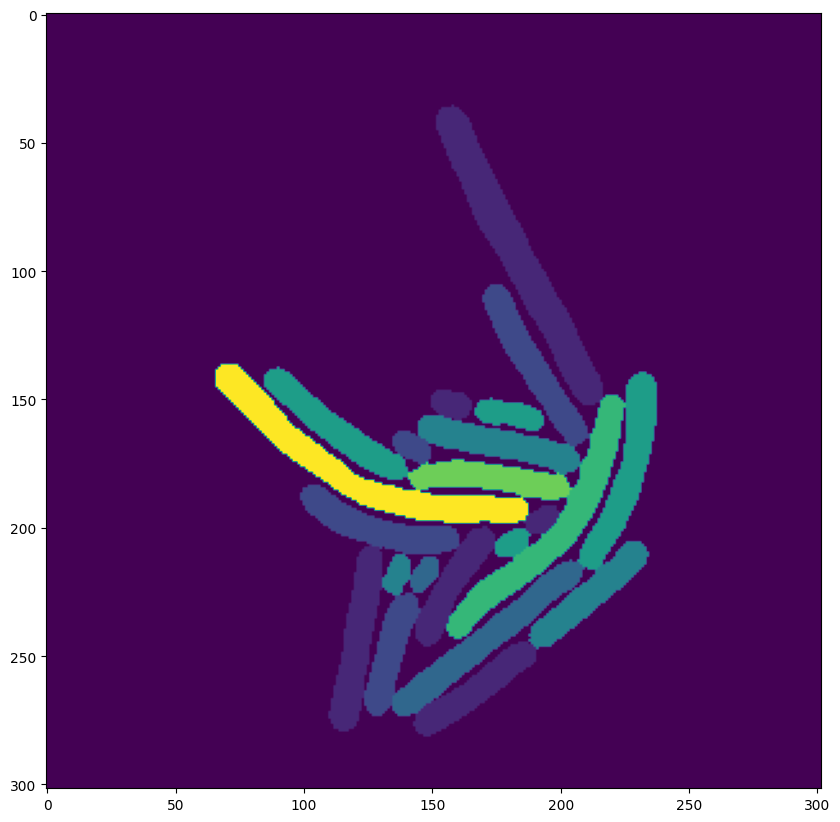

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
plt.imshow(img_array)

In [4]:
composer = LinkComposer.read_folder(mask_folder="/Users/sherryyang/Documents/wiggins-lab/data/f/masks/*.png", phase_folder="/Users/sherryyang/Documents/wiggins-lab/data/f/phase/*.tif")

Frame:7, Mask label:1. Pixels number = 2. cannot make polygon. A linearring requires at least 4 coordinates.
Frame:11, Mask label:46. Pixels number = 1. cannot make polygon. A linearring requires at least 4 coordinates.
Frame:13, Mask label:1. Pixels number = 1. cannot make polygon. A linearring requires at least 4 coordinates.
Frame:22, Mask label:26. Pixels number = 2. cannot make polygon. A linearring requires at least 4 coordinates.


In [5]:
import pandas as pd

G = composer.make_new_dircted_graph()

excel_file = pd.ExcelFile("/Users/sherryyang/Documents/wiggins-lab/data/manuelly_linked_new.xlsx")
sheet_names = excel_file.sheet_names

In [6]:
import numpy as np

for frame_start in range(len(sheet_names)):
    frame_end = frame_start + 1
    time_sheet = sheet_names[frame_start]
    df = excel_file.parse(time_sheet)
    df = df.astype(str)
    [source, target] = df.columns
    for index, row in df.iterrows():
        df = df.dropna()
        df = df.astype(float).astype(int)
        print(frame_start, row[source], frame_end, row[target])
        composer.link(G, Cell(frame_start, int(row[source])), Cell(frame_end, int(row[target])))

0 3 1 3
0 5 1 5
0 6 1 6
0 9 1 10
0 4 1 4
0 2 1 2
0 8 1 9
0 10 1 11
0 11 1 12
0 15 1 16
0 22 1 23
0 23 1 25
0 19 1 20
0 17 1 18
0 14 1 15
0 16 1 17
0 26 1 29
0 25 1 28
0 34 1 38
0 32 1 35
0 39 1 42
0 30 1 33
0 24 1 26
0 33 1 37
0 27 1 30
0 31 1 36
0 28 1 32
0 41 1 45
0 21 1 24
0 29 1 31
1 2 2 2
1 3 2 3
1 4 2 4
1 5 2 5
1 6 2 6
1 9 2 8
1 10 2 9
1 11 2 10
1 12 2 11
1 15 2 14
1 16 2 15
1 17 2 16
1 18 2 17
1 20 2 20
1 23 2 21
1 24 2 22
1 25 2 23
1 26 2 24
1 28 2 25
1 29 2 26
1 30 2 27
1 31 2 28
1 32 2 29
1 33 2 30
1 35 2 31
1 36 2 32
1 37 2 33
1 38 2 34
1 42 2 38
1 45 2 40
2 3 3 3
2 5 3 5
2 6 3 6
2 9 3 9
2 4 3 4
2 2 3 2
2 8 3 8
2 10 3 10
2 11 3 11
2 15 3 15
2 21 3 21
2 23 3 22
2 20 3 19
2 17 3 17
2 14 3 14
2 16 3 16
2 26 3 25
2 25 3 24
2 34 3 33
2 31 3 30
2 38 3 37
2 30 3 29
2 24 3 23
2 33 3 32
2 27 3 26
2 32 3 31
2 29 3 28
2 40 3 39
2 28 3 27
2 22 3 20
3 3 4 3
3 5 4 5
3 6 4 6
3 9 4 10
3 4 4 4
3 2 4 2
3 8 4 8
3 10 4 11
3 11 4 12
3 15 4 16
3 21 4 22
3 22 4 24
3 19 4 20
3 17 4 18
3 14 4 15
3 1

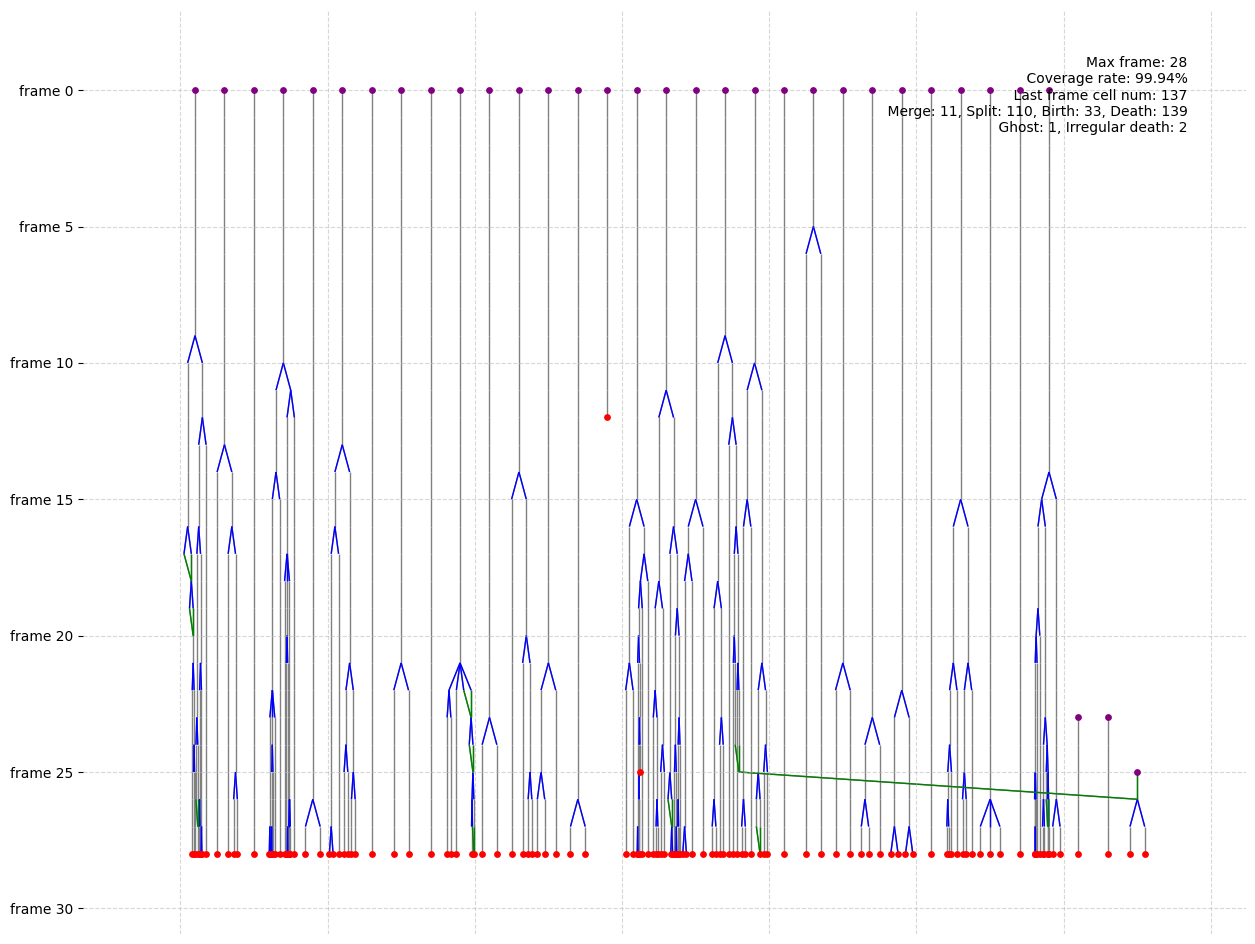

In [7]:
visualizer.quick_lineage(G, figsize=(15,12))

In [8]:
G1 = link_algorithm.silly_linker(composer)

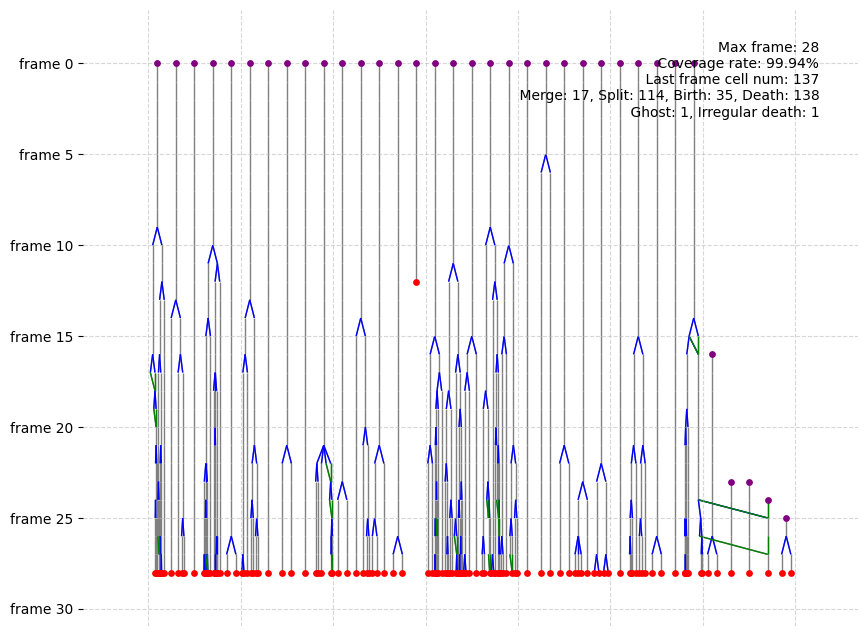

In [9]:
visualizer.quick_lineage(G1)

In [32]:
defines = CellDefine.define_cells(G)

In [33]:

for define in defines:
    if define.die and (define.cell.frame < 28):
        print(define, define.cell)

Cell: frame_12, label_40: split:False, merge:False, birth:False, die:True, regular:False, self.ghost:False Cell: frame_12, label_40
Cell: frame_25, label_65: split:False, merge:False, birth:False, die:True, regular:False, self.ghost:False Cell: frame_25, label_65
Cell: frame_19, label_3: split:False, merge:False, birth:False, die:True, regular:False, self.ghost:False Cell: frame_19, label_3


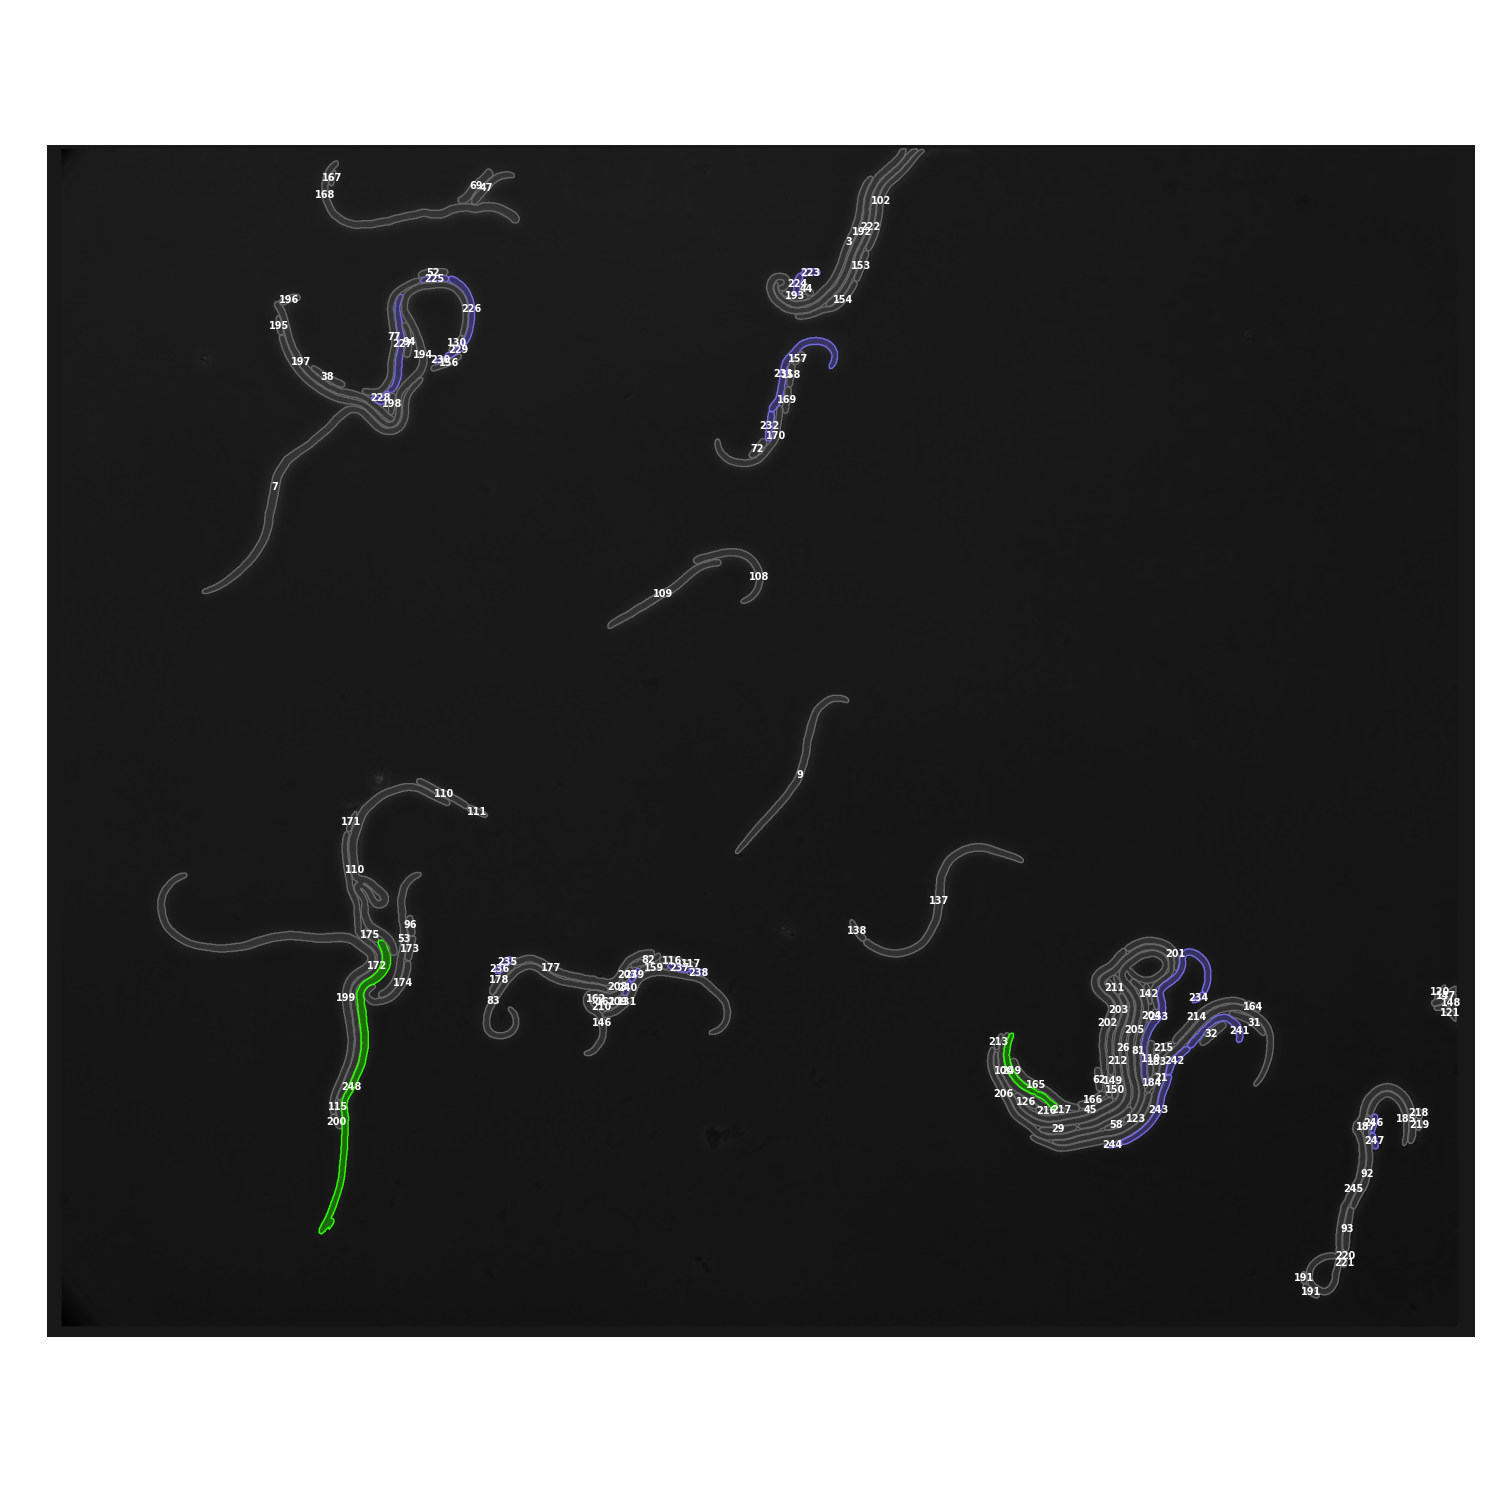

No such comm: 8e64cc449f164650812c8d21145803cc


In [13]:
import matplotlib.pyplot as plt
import PIL
from mpl_interactions import ioff, panhandler, zoom_factory
from PIL import Image

%matplotlib widget

plt.ioff()
fig, ax = plt.subplots(figsize=(15, 15))
fig.tight_layout()


frame = 28

label_info = visualizer.get_label_info(G)
image = composer.get_single_frame_phase(frame)
ax =  visualizer.subplot_single_frame_phase(ax = ax, G = G, image = image, cells_frame_dict = composer.cells_frame_dict, frame = frame, info = label_info, fontsize = 7, figsize = (15,15), representative_point=True)

disconnect_zoom = zoom_factory(ax)
display(fig.canvas)

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from mpl_interactions import zoom_factory
from IPython.display import display
import matplotlib

In [22]:
import random
color_dic = {}
mask_label_info = {}
random.seed(1)
for cell in composer.cells:
    if cell.label in color_dic:
        color = color_dic[cell.label]
    else:
        color = visualizer.new_color(random.random(), 0.7, 1)
        color_dic[cell.label] = color 
    mask_label_info[cell] = [cell.label, color]


In [23]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from mpl_interactions import zoom_factory
from IPython.display import display
import matplotlib

plt.close('all')
matplotlib.use('TkAgg')  # Make sure this backend is compatible with your environment

frame = 0  # Initialize frame
max_frame = composer.frame_num - 1

# Assuming visualizer, composer, and G are defined
# Create the initial plot
plt.ioff()
fig, ax = plt.subplots(figsize=(10, 10))
fig.tight_layout()


label_info_1 = visualizer.get_label_info(G)
label_info_2 = visualizer.get_generation_label_info(G)
labels = [label_info_1, label_info_2, mask_label_info ]
li_index = 0
label_info = labels[li_index]



label_styles = ["regular", "circled", "empty"]
ls_index = 0
label_style = label_styles[ls_index]


image = composer.get_single_frame_phase(frame)
ax = visualizer.subplot_single_frame_phase(ax=ax, G=G, image=image, cells_frame_dict=composer.cells_frame_dict, label_style  = label_style, frame=frame, info=label_info, fontsize=7, figsize=(15,15), representative_point=True)
disconnect_zoom = zoom_factory(ax)

# Update plot function
def update_plot(frame, ax, fig):
    global label_styles, labels, li_index, ls_index

    label_info = labels[li_index]
    label_style = label_styles[ls_index]

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ax.clear()
    image = composer.get_single_frame_phase(frame)
    ax =  visualizer.subplot_single_frame_phase(ax=ax, G=G, image=image, cells_frame_dict=composer.cells_frame_dict, label_style  = label_style, frame=frame, info=label_info, fontsize=7, figsize=(15,15), representative_point=True)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    disconnect_zoom = zoom_factory(ax)
    fig.suptitle(f"Frame: {frame}, use keyboard: ⬅️ ➡️ to change frame, use 'c' to circle label, use 1 to change cell tag ", color = "blue")
    fig.canvas.draw_idle()
    return ax

def on_key(event):
    global frame, ax, max_frame, fig, li_index , ls_index
    if event.key in ['right', 'down']:
        frame = min(frame + 1, max_frame) 
        update_plot(frame, ax, fig)
    elif event.key in ['left', 'up']:
        frame  = max(frame - 1, 0)
        update_plot(frame, ax, fig)
    elif event.key == 'c':
        ls_index += 1
        ls_index =  ls_index % len(label_styles)
        update_plot(frame, ax, fig)
    elif event.key == '1':
        li_index += 1
        li_index =  li_index % len(labels)
        update_plot(frame, ax, fig)
    
        

fig.suptitle(f"Frame: {frame}, use keyboard: ⬅️ ➡️, use 'l' to change label, use c to change color/tag", color = "blue")
fig.canvas.mpl_connect('key_press_event', lambda event: on_key(event))

# Show the plot in a separate window
plt.show()
